# 02_vivo_markers

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
adata = sc.read("../data/processed/01_raw_counts.h5ad")
metadata = pd.read_csv("../data/processed/02_metadata.csv", index_col=0)

adata = adata[metadata.index].copy()
adata.obs = metadata

adata.obs.cluster_names = adata.obs.cluster_names.astype('category')

In [3]:
sc.pp.normalize_total(adata, target_sum=10_000)
sc.pp.log1p(adata)
adata.raw = adata

In [4]:
genes = pd.read_excel("../data/raw/resolve_genes.xlsx", sheet_name="IDs")["Gene name"].values
common_genes = np.intersect1d(adata.var_names, genes)

/opt/conda/envs/cellrank-1.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [5]:
sc.tl.dendrogram(adata, groupby="cluster_names")

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'orig.ident' as categorical
... storing 'Well_coordinates' as categorical
... storing 'Amp_batch_ID' as categorical
... storing 'Cell_barcode' as categorical
... storing 'Pool_barcode' as categorical
... storing 'Batch' as categorical
... storing 'Condition' as categorical
... storing 'SampleName' as categorical
... storing 'Stage' as categorical
... storing 'Source' as categorical
... storing 'SubGroup' as categorical
... storing 'Day' as categorical
... storing 'Phase' as categorical


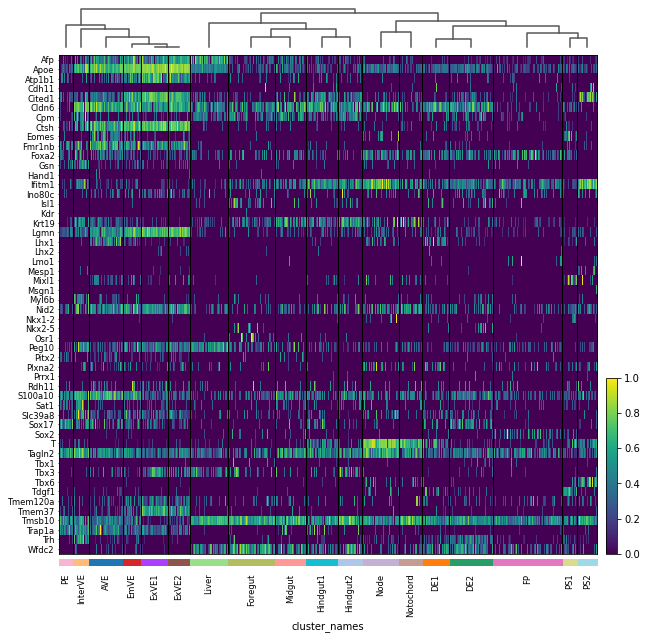

In [6]:
sc.pl.heatmap(adata, common_genes, groupby="cluster_names", show_gene_labels=True, swap_axes=True, dendrogram=True, standard_scale='var')

In [7]:
!jupyter nbconvert --to html 02_vivo_markers.ipynb --output-dir="../reports"

[NbConvertApp] Converting notebook 02_vivo_markers.ipynb to html
[NbConvertApp] Writing 574718 bytes to ../reports/02_vivo_markers.html
